<a href="https://colab.research.google.com/github/natalie930302/py4001/blob/main/project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#股價(收盤價/成交量)分析

In [39]:
import pandas as pd
sheet_url = "https://docs.google.com/spreadsheets/d/1nblZ2L3E0LnI5B3mxVnQDZ3h7VBysELn/edit#gid=621462905"
url_1 = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
df = pd.read_csv(url_1)

df.head()

,Date,Close Price,Volume
0,2021/06/28,590.0,9056869.0
1,2021/06/25,591.0,11355715.0
2,2021/06/24,590.0,11435647.0
3,2021/06/23,595.0,21500052.0
4,2021/06/22,578.0,17786329.0


In [40]:
# 按日期排序(升序) 
df.sort_values(by = "Date", inplace = True, ascending = True) # df = df.sort_values(by = "Date", ascending = True)

df.head()

,Date,Close Price,Volume
358,2020/01/02,326.9394,11224165.0
357,2020/01/03,327.4216,14295651.0
356,2020/01/06,320.1884,15210531.0
355,2020/01/07,317.7774,17053282.0
354,2020/01/08,317.7774,12484410.0


In [41]:
# 將 Date 參數轉為時間
df["Date"] = pd.to_datetime(df["Date"])
# 將 Date 設為索引
df.set_index("Date", inplace = True)

df.head()

,Close Price,Volume
Date,,
2020-01-02,326.9394,11224165.0
2020-01-03,327.4216,14295651.0
2020-01-06,320.1884,15210531.0
2020-01-07,317.7774,17053282.0
2020-01-08,317.7774,12484410.0


In [42]:
# 索引
df.index

DatetimeIndex(['2020-01-02', '2020-01-03', '2020-01-06', '2020-01-07',
               '2020-01-08', '2020-01-09', '2020-01-10', '2020-01-13',
               '2020-01-14', '2020-01-15',
               ...
               '2021-06-15', '2021-06-16', '2021-06-17', '2021-06-18',
               '2021-06-21', '2021-06-22', '2021-06-23', '2021-06-24',
               '2021-06-25', '2021-06-28'],
              dtype='datetime64[ns]', name='Date', length=359, freq=None)

In [43]:
# 對應列
df.columns

Index(['Close Price', 'Volume'], dtype='object')

In [44]:
# 敘述統計 
df.describe()

,Close Price,Volume
count,359.000000,3.590000e+02
mean,442.517909,2.200128e+07
std,124.826864,1.343225e+07
min,241.498700,5.354339e+06
25%,312.767800,1.381583e+07
50%,433.770200,1.828667e+07
75%,583.289300,2.529959e+07
max,667.486100,8.802371e+07


In [45]:
# 按列搜尋
df["Close Price"]

Date
2020-01-02    326.9394
2020-01-03    327.4216
2020-01-06    320.1884
2020-01-07    317.7774
2020-01-08    317.7774
                ...   
2021-06-22    578.0000
2021-06-23    595.0000
2021-06-24    590.0000
2021-06-25    591.0000
2021-06-28    590.0000
Name: Close Price, Length: 359, dtype: float64

In [46]:
# 按索引值搜尋
df.loc["2021-06-28"]

Close Price        590.0
Volume         9056869.0
Name: 2021-06-28 00:00:00, dtype: float64

In [47]:
# Index Location: iloc()
df.iloc[-5:]

,Close Price,Volume
Date,,
2021-06-22,578.0,17786329.0
2021-06-23,595.0,21500052.0
2021-06-24,590.0,11435647.0
2021-06-25,591.0,11355715.0
2021-06-28,590.0,9056869.0


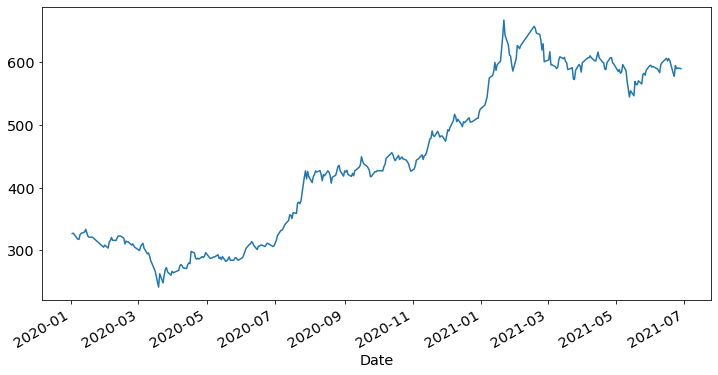

In [48]:
df["Close Price"].plot.line()

In [49]:
df.dtypes
# df['Volume']=df['Volume'].astype(float)

Close Price    float64
Volume         float64
dtype: object

In [50]:
import matplotlib.pyplot as plt
import numpy as np

params = {'legend.fontsize': 'x-large',
      'figure.figsize': (12, 6),
      'axes.labelsize': 'x-large',
      'axes.titlesize': 'x-large',
      'xtick.labelsize': 'x-large',
      'ytick.labelsize': 'x-large'}
plt.rcParams.update(params)


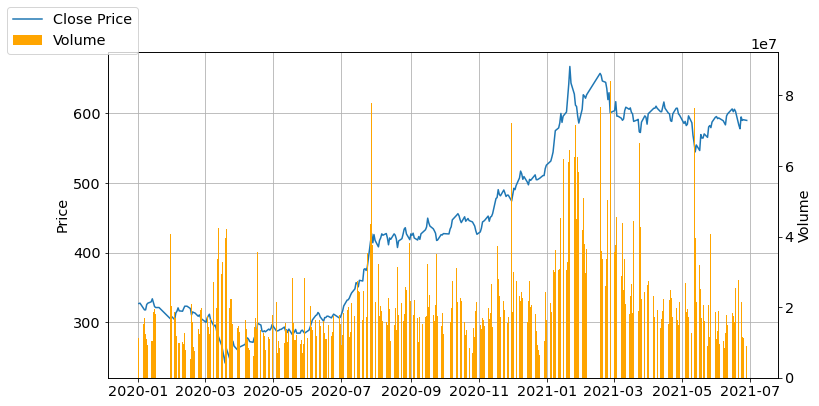

In [53]:
fig, ax1 = plt.subplots()
# 收盤價
ax1.plot(df["Close Price"])
ax1.set_ylabel("Price")
ax1.grid(True)
# 成交量
ax2 = ax1.twinx() # 共用x軸
ax2.bar(x = df.index, height = df["Volume"], color = "orange")
ax2.set_ylabel("Volume")

fig.legend(["Close Price", "Volume"], loc = "upper left")